# Example 2: Forward modeling of RT model combination (surface + canopy part)

## 1. Narrative (Examples of different model combination (surface + canopy part))

This notebook demonstrates model combinations of

1. **Dubois95 + SSRT**
2. **Oh04 + WaterCloud**

## 2. Requirements

- Installation of SenSE

## 3. Required imports

In [1]:
import numpy as np
from sense.util import f2lam
from sense.model import RTModel
from sense.soil import Soil
from sense.canopy import OneLayer
import matplotlib.pyplot as plt

## 4. Dubois95+SSRT for different incidence angles

### 4.1 Input parameters for the RT model combination

In [2]:
# array with different incidence angles in radians
theta_deg = np.arange(0.,70.)
theta = np.deg2rad(theta_deg) # incidence angle [radians]

# soil model parameters
f  = 13.  # frequency [GHz]
lam = f2lam(f)  # wavelength [m]
s = 0.15/100.  # surface roughness [m]
eps = 15. - 4.0j # dielectric constant

# canopy parameters for short alfalfa
d = 0.17 # vegetation height [m]
tau = 2.5 # optical depths
ke = tau/d # extinction coefficient [m⁻¹]
omega = 0.27 # scattering albedo
ks=omega*ke

### 4.2 Forward modeling of RT model combination Dubois95 and SSRT (rayleigh scattering)
**First model run** with model parameters for **small alfalfa**

In [3]:
# Define models and polarization to be used
models = {'surface' : 'Dubois95', 'canopy' : 'turbid_rayleigh'} # For SSRT two scattering models are implemented 'turbid_rayleigh' and 'turbid_isotropic'
# models = {'surface' : 'Oh92', 'canopy' : 'turbid_isotropic'} # alternative with different surface and canopy models
pol='vv' # target polarization

# Soil model initialization based on previously defined input parameters
S = Soil(f=f, s=s, eps=eps)

# Canopy model initialization based on previously defined input parameters
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])

# Combined Model initialization
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)

# Run RT model
RT.sigma0()
back_short = RT.stot[pol]

/tmp/sense/surface/dubois95.py:42: RuntimeWarning: divide by zero encountered in divide
  b = 10**-2.35 * (np.cos(self.theta) ** 3) / (np.sin(self.theta) ** 3)
/tmp/sense/surface/dubois95.py:45: RuntimeWarning: invalid value encountered in multiply
  return b * c * d
/tmp/sense/surface/dubois95.py:35: RuntimeWarning: divide by zero encountered in divide
  a = 10**-2.75 * (np.cos(self.theta) ** 1.5) / (np.sin(self.theta) ** 5)
/tmp/sense/surface/dubois95.py:38: RuntimeWarning: invalid value encountered in multiply
  return a * c * d


**Second model run** with model parameters (canopy) for **tall alfalfa**

In [4]:
# redefine canopy parameters for tall alfalfa
d = 0.55 # vegetation height [m]
tau = 0.45 # optical depths
ke = tau/d # extinction coefficient [m⁻¹]
omega = 0.175 # scattering albedo
ks=omega*ke

# initialize and run of the model combination
S = Soil(f=f, s=s, eps=eps)
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
RT.sigma0()

### 4.3 Visualization

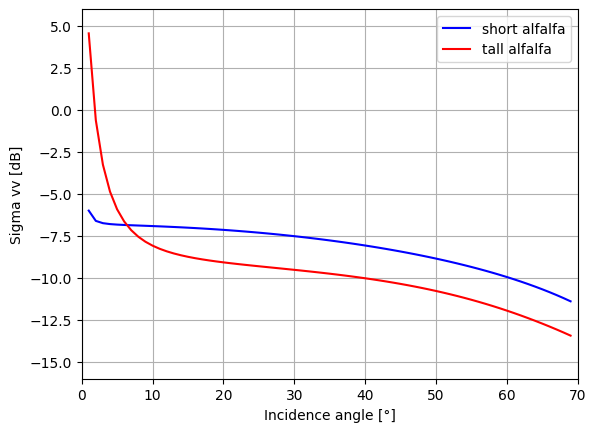

In [5]:
# plot backscatter changes for short and high alfalfa based on the incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_deg, 10.*np.log10(back_short), label='short alfalfa', color='b')
ax.plot(theta_deg, 10.*np.log10(RT.stot[pol]), label='tall alfalfa', color='r')

ax.legend()

ax.grid()
ax.set_xlabel('Incidence angle [°]')
ax.set_ylabel('Sigma vv [dB]')
ax.set_xlim(0.,70.)
ax.set_ylim(-16.,6.)

plt.show()

## 5. Oh04+WaterCloud for different incidence angles

### 5.1 Input parameters for the RT model combination

In [6]:
# Parameters for both models
theta = np.deg2rad(40) # incidence angle [radians]
f  = 5.3 # Frequency [GHz]

# soil parameter
s = 0.3/100. # surface roughness [m]
mv = np.linspace(0.01,0.4) # soil moisture [m³/m³]
# calculations
lam = f2lam(f)  # wavelength [m]
k = 2.*np.pi/lam # radar wave number
ks = k * s

# canopy parameters
A_vv = 0.0950 # empirical parameter - need to be optimized for each test site
B_vv = 0.5513 # empirical parameter - need to be optimized for each test site
A_hh = 0 # empirical parameter - need to be optimized for each test site
B_hh = 0 # empirical parameter - need to be optimized for each test site
A_hv = 0 # empirical parameter - need to be optimized for each test site
B_hv = 0 # empirical parameter - need to be optimized for each test site

V1 = 0.02 # parameter describing the canopy (todo: find realistic values)
V2 = np.linspace(0.5,5) # # parameter describing the canopy (todo: find realistic values)



### 5.2 Forward modeling of RT model combination Oh04 and WaterCloud

In [7]:
# Define models and polarization to be used
models = {'surface' : 'Oh04', 'canopy' : 'water_cloud'}
pol='vv' # target polarization

# Soil model initialization based on previously defined input parameters
S = Soil(f=f, s=s, mv=mv)

# Canopy model initialization based on previously defined input parameters
C = OneLayer(A_vv=A_vv, B_vv=B_vv, A_hh=A_hh, B_hh=B_hh, A_hv=A_hv, B_hv=B_hv, V1=V1, V2=V2, d=1, ks_v=1, ke_v=1, ke_h=1, canopy=models['canopy'])

# Combined Model initialization
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)

# Run RT model
RT.sigma0()
backscatter_vv = RT.stot[pol] # total modeled backscatter
backscatter_vv_g = RT.s0g[pol] # modeled ground contribution
backscatter_vv_c = RT.s0c[pol] # modeled canopy contribution

### 5.3 Visualization

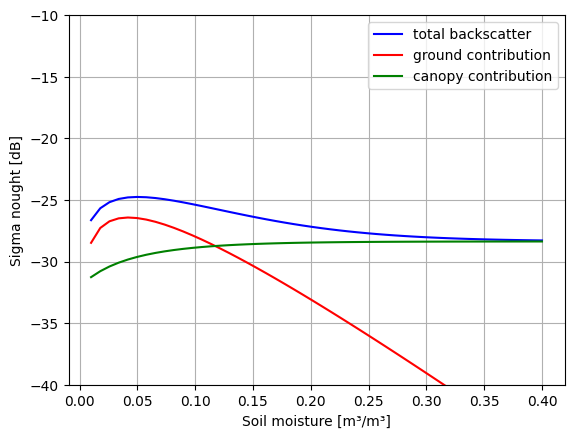

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mv, 10.*np.log10(backscatter_vv), label='total backscatter', color='b')
ax.plot(mv, 10.*np.log10(backscatter_vv_g), label='ground contribution', color='r')
ax.plot(mv, 10.*np.log10(backscatter_vv_c), label='canopy contribution', color='g')

ax.legend()

ax.grid()
ax.set_xlabel('Soil moisture [m³/m³]')
ax.set_ylabel('Sigma nought [dB]')

ax.set_ylim(-40.,-10.)

plt.show()